In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [4]:
from google.colab import files
data_to_load = files.upload() #for uploading the  csv sheet

Saving student_scores - student_scores.csv to student_scores - student_scores.csv


In [5]:
import io
data= pd.read_csv(io.BytesIO(data_to_load['student_scores - student_scores.csv']))

In [6]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
x=data[["Hours"]]
y=data["Scores"]

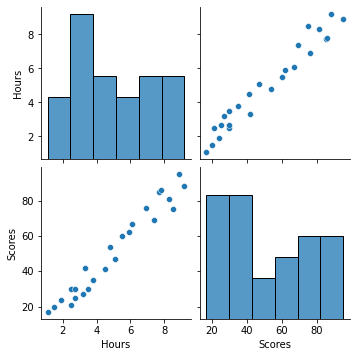

In [9]:
sns.pairplot(data)

Text(0, 0.5, 'percentage')

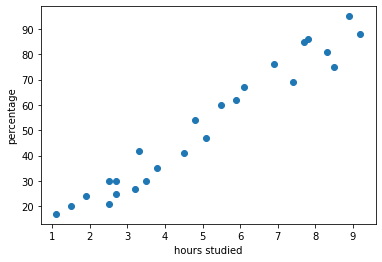

In [10]:
plt.scatter(x,y)
plt.xlabel("hours studied")
plt.ylabel("percentage")

In [11]:
a=data.corr(method ='pearson')

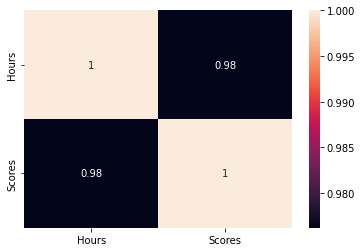

In [12]:

sns.heatmap(a,annot=True)

In [13]:
a.iloc[0,1] #correlation between scores and percentage

0.9761906560220888

In [14]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred=lin.predict(x_test)

In [17]:
pd.DataFrame({"actual":y_test,"predicted":y_pred}).reset_index(drop=True)

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=True)

21.598769307217456

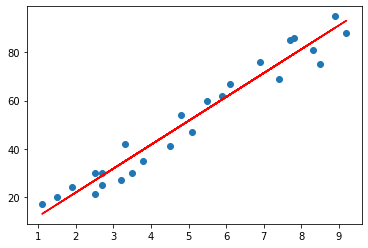

In [19]:
pred_line=lin.coef_*x+lin.intercept_
plt.plot(x,pred_line,color="r")
plt.scatter(x,y)

In [20]:
hours=np.array([[9.25]])
predicted = lin.predict(hours)
print(predicted)

[93.69173249]
